# Introduction:

 Given the reviews.csv dataset, we have to perform sentimental analysis.
 Task 1: Data Preprocessing on text (Column name : content)
 Task 2: Data Exploration ( Exploring different plots on text data and to come up with the wordcloud)
 Task 3: Data Modelling using Lexicon based models.

## Importing Libraries

In [1]:
import pandas as pd # using it to load the csv file
import re
import nltk  # nltk for text preprocessing tasks
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Loading Dataset

In [2]:
df = pd.read_csv('reviews.csv')

In [3]:
df.head() # displaying first 5 rows

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,Why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,Terrible Update! This app used to be perfect f...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app is deceivingly terrible. There are so...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16787 non-null  object
 1   userName              16787 non-null  object
 2   userImage             16787 non-null  object
 3   content               16787 non-null  object
 4   thumbsUpCount         16787 non-null  int64 
 5   reviewCreatedVersion  14430 non-null  object
 6   at                    16787 non-null  object
 7   replyContent          9168 non-null   object
 8   repliedAt             9168 non-null   object
 9   appVersion            14430 non-null  object
 10  sortOrder             16787 non-null  object
 11  appId                 16787 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.5+ MB


In [5]:
df.isnull().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
thumbsUpCount              0
reviewCreatedVersion    2357
at                         0
replyContent            7619
repliedAt               7619
appVersion              2357
sortOrder                  0
appId                      0
dtype: int64

# 1. Data Preprocessing

# Lower Case :
Convert all text to lowercase to ensure uniformity.
".str.lower()" is the correct approach for converting all strings in a Pandas DataFrame column to lowercase.

In [6]:
df['content'] = df['content'].str.lower()

## Remove Links :
Remove any URLs or hyperlinks present in the text data.

In [7]:
df['content'] = df['content'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',' ')

C:\Users\sansk\AppData\Local\Temp\ipykernel_328\3924736140.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',' ')


## Remove next lines (\n): 
Remove newline characters to ensure that each review is treated as a single unit of text.

In [8]:
df['content'] = df['content'].str.replace('\n',' ')

## Remove Words containing numbers:
Remove any words that contain numbers, as they might not carry much meaning in the context of text analysis.

In [9]:
df['content'] = df['content'].str.replace('\d+','') # \d stands for "any digit" and + stands for one or more

C:\Users\sansk\AppData\Local\Temp\ipykernel_328\2695534327.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('\d+','') # \d stands for "any digit" and + stands for one or more


## Extra spaces:
Remove any extra spaces to ensure consistency in spacing between words.

In [10]:
df['content'] = df['content'].apply(lambda x: ' '.join(x.split()))

The expression ' '.join(text.split()) is used to remove extra whitespace (spaces, tabs, etc.) from a string by splitting the string into words, then joining those words back together with a single space between them.

## Special Characters:
Remove any special characters like punctuation marks, which might not be relevant for analysis.

In [11]:
def remove_specialchar(text):
   return re.sub(r'[^\w\s]','',text) 
df['content'] = df['content'].apply(remove_specialchar)

## Removal of stop words:
 Remove common stop words like 'and', 'the', 'is', etc., which do not carry much meaning on their own.
 stop_words is a Python set that contains common stopwords for the English language, which can be used later in the code for tasks such as text preprocessing or filtering out stopwords from text data to focus on the more meaningful words.

In [12]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)
    
df['content'] = df['content'].apply(remove_stopwords)



## Stemming:
Reduce words to their root form by removing suffixes, using stemming algorithms like Porter or Snowball stemming.
Stemming is the process of removing suffixes from words to obtain their root forms, known as stems. It's a rule-based heuristic process that cuts off the end of words using predefined rules. Stemmers do not consider the context of the word, and they may produce non-realistic words or stems.
Stemming is generally faster and less computationally intensive compared to lemmatization. 

In [13]:
stemmer = PorterStemmer()

def stemming(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

df['content'] = df['content'].apply(stemming)
df['content'].head()

0    recur task everi day need todolist remind buzz...
1    instead shop around download anydo wide use se...
2    everi blue app ask updat acct email everyth ta...
3    terribl updat app use perfect plan certain tas...
4    app deceivingli terribl realli nice design fea...
Name: content, dtype: object

## Lemmatization:
Similar to stemming, but instead of just removing suffixes, lemmatization considers the context and converts words to their base or dictionary form.
Lemmatization is a more sophisticated process that involves reducing words to their base or dictionary form, known as lemmas. Unlike stemming, lemmatization considers the context of the word and applies linguistic rules to determine the lemma. Lemmatization typically requires a lexicon or a dictionary lookup to accurately determine the lemma.
Lemmatization produces real words, but it can be slower and more resource-intensive than stemming due to the need for dictionary lookups and linguistic analysis.

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sansk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

 WordNet is a lexical database for the English language, which includes words and their semantic relationships.

In [15]:
lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

df['content'] = df['content'].apply(lemmatization)
df['content'].head()

0    recur task everi day need todolist remind buzz...
1    instead shop around download anydo wide use se...
2    everi blue app ask updat acct email everyth ta...
3    terribl updat app use perfect plan certain tas...
4    app deceivingli terribl realli nice design fea...
Name: content, dtype: object

# 2. EDA

## Barplot

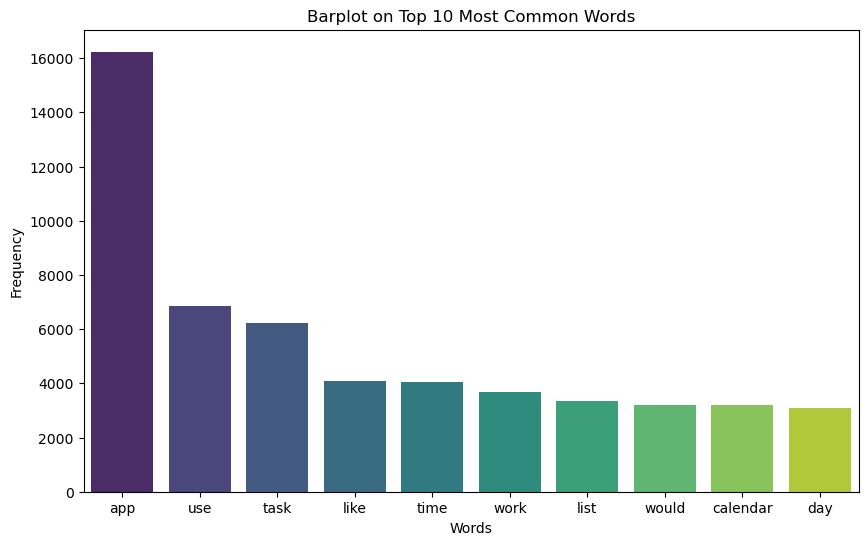

In [16]:
# Plot for top 10 most commmon words 
#Splitting the text into words and counting occurrence of each word and selecting top 10 common words
top_words = df['content'].str.split(expand = True).stack().value_counts()[:10]

# Creating a bar plot
plt.figure(figsize=(10, 6)) # creates new figure 
# In x : words , In y: frequency of those words
sns.barplot(x = top_words.index, y = top_words.values, palette='viridis')
plt.title('Barplot on Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

##  WordCloud

In [17]:
df['content'].isnull().sum()

0

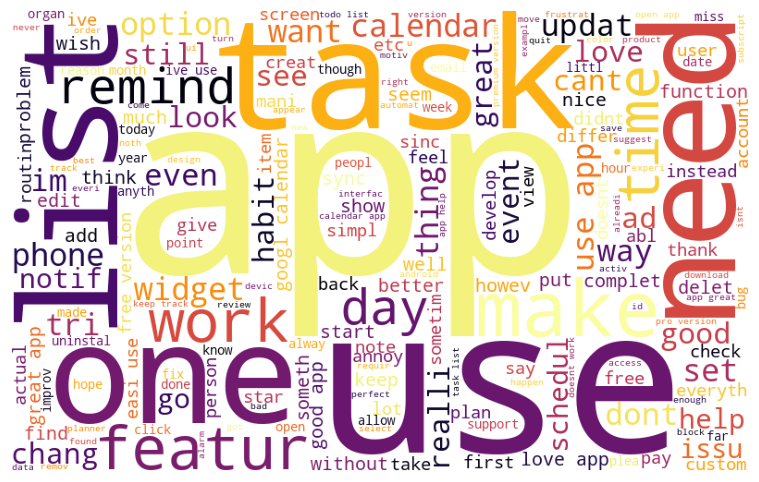

In [63]:
string = ' '.join(df['content'])  # Concatenate all text data into a single string
# Generate word cloud
wordcloud = WordCloud(width = 800, height = 500, background_color = 'white',colormap = 'inferno').generate(string)

# Plot Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Sentimental Analysis:
Lexicon-based sentiment analysis is a technique used in natural language processing to detect the sentiment of a piece of text. It uses lists of words and phrases (lexicons or dictionaries) that are linked to different emotions to label the words (e.g. positive, negative, or neutral) and detect sentiment.
Lexicons like AFINN, SentiWordNet, or VADER are commonly used for sentiment analysis.

##  1. VADER (Valence Aware Dictionary and Sentiment Reasoner) - Bag of words approach

This approach takes all the words in our sentence and it has a value of either positive, negative or neutral for each of those words and it combines up and tells how the sentiment of the statement is . 
This approach does not account for relationships between words which in human speech is very important but at least is a good start

In [67]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm # Progress bar tracker for when we do some loops on the data
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sansk\AppData\Roaming\nltk_data...


In [68]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

We can see that this vader approach has tagged this negative: 0 , neutral: 0.3 and positive: 0.682
So mostly positive.
Compound score is an aggregation of negative, neutral and positive score

In [70]:
sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

Now the polarity score of this is moslty negative and neutral and nothing positive

In [114]:
# Run the polarity score on the entire dataset
res = {}  # Output is stored into dictionary 
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['content']
    res[i] = sia.polarity_scores(text)

  0%|          | 0/16787 [00:00<?, ?it/s]

We want to store this result into pandas dataframe

In [123]:
polarity = pd.DataFrame(res).T  # .T for flipping horizontally
polarity.head()

,neg,neu,pos,compound
0,0.250,0.695,0.055,-0.8555
1,0.052,0.887,0.060,0.1027
2,0.145,0.813,0.042,-0.6369
3,0.070,0.769,0.161,0.4588
4,0.174,0.650,0.176,0.0346


In [141]:
merge = pd.merge(df,polarity, how = 'left', left_index = True, right_index = True)
merge.head(2)

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,neg,neu,pos,compound
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,recur task everi day need todolist remind buzz...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo,0.250,0.695,0.055,-0.8555
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead shop around download anydo wide use se...,8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo,0.052,0.887,0.060,0.1027


In [143]:
def categorize_sentiment(compound):
    if compound > 0.05:
        return 'Positive'
    elif compound < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
merge['Sentiment'] = merge['compound'].apply(categorize_sentiment)
merge.head()

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,neg,neu,pos,compound,Sentiment
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,recur task everi day need todolist remind buzz...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo,0.250,0.695,0.055,-0.8555,Negative
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead shop around download anydo wide use se...,8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo,0.052,0.887,0.060,0.1027,Positive
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,everi blue app ask updat acct email everyth ta...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo,0.145,0.813,0.042,-0.6369,Negative
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terribl updat app use perfect plan certain tas...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo,0.070,0.769,0.161,0.4588,Positive
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,app deceivingli terribl realli nice design fea...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo,0.174,0.650,0.176,0.0346,Neutral


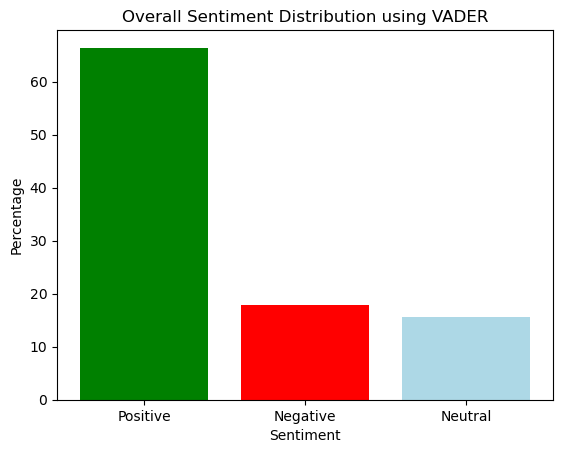

In [194]:
import matplotlib.pyplot as plt

# Calculate the percentage of each sentiment category
sentiment_counts = merge['Sentiment'].value_counts(normalize=True) * 100

# Plot a bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'lightblue'])
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Overall Sentiment Distribution using VADER')
plt.show()


In [177]:
# Creating another CSV as output for my VADER Approach
merge.to_csv("VADER_Approach.csv")

## 2. AFINN : (Affective Norms for English Words)
AFINN was manually created by collecting words from various sources and assigning sentiment scores to them based on their emotional impact. The sentiment scores range from -5 (most negative) to +5 (most positive), with 0 indicating neutrality.
It has been widely used in sentiment analysis tasks due to its simplicity and effectiveness.

In [161]:
!pip install afinn

     ---------------------------------------- 0.0/52.6 kB ? eta -:--:--
     -------------------------------------- - 51.2/52.6 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 52.6/52.6 kB 683.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53437 sha256=467c83e2710e35519676e33c588726e250ea9180a0be9acb7636f1e1442146b2
  Stored in directory: c:\users\sansk\appdata\local\pip\cache\wheels\ee\d3\a0\f9255ebac29886acb1c28b35b37523f6399677fa06be379f25
Successfully built afinn


In [189]:
from afinn import Afinn
afinn = Afinn()
def calculate_sentiment_score(text):
    return afinn.score(text)
def find_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'
df['Sentiment_Score'] = df['content'].apply(calculate_sentiment_score)
df['Sentiment'] = df['Sentiment_Score'].apply(find_sentiment)
afinn_df = df[['content','Sentiment_Score','Sentiment']]
afinn_df.tail()

,content,Sentiment_Score,Sentiment
16782,excel app,0.0,Neutral
16783,love easi use make life organ love way put pho...,12.0,Positive
16784,love could make plan check app almost everyday...,6.0,Positive
16785,exactli need,0.0,Neutral
16786,good,3.0,Positive


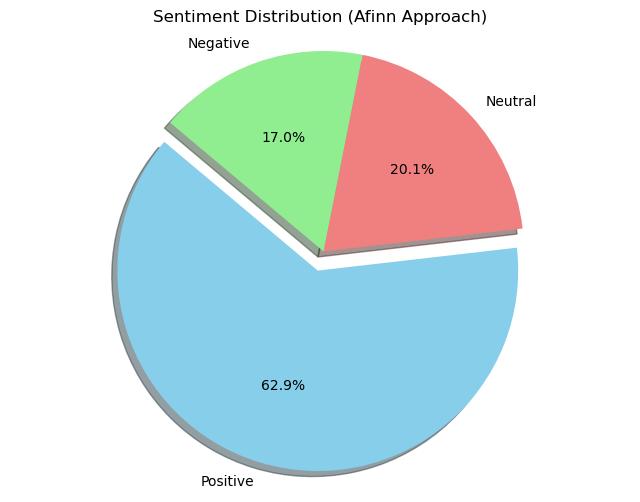

In [171]:
sentiment_counts = afinn_df['Sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['skyblue', 'lightcoral', 'lightgreen']
explode = (0.1, 0, 0)  # explode the 1st slice (positive)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution (Afinn Approach)')
plt.show()

In [193]:
# Output of AFINN Approach
afinn_df.to_csv("AFINN_Approach.csv")